# Unemployment rate in SA

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.metrics import r2_score
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
from statsmodels.formula.api import rlm
import statsmodels.api as sm
from sklearn.utils import resample
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
import re
import string

The purpose of this notebook is to explore variables that could potetially have a relationship with our response variables, i.e unemployment rate.


Government has published a 25-year ‘review’ focusing on the progress made by South Africa since democracy in 1994 in areas such as unemployment. Citing data from Stats SA, the review shows that 8.9 million people were employed in 1994, with an unemployment rate of 20%. However, it should be noted that the unemployment rate at that time did not include the Bantustans and the black majority. In 1994, there were 41 million South Africans, therefore the employed represented 21% of the population. By the end of 2018, the number of people employed had almost doubled to 16.5 million people, representing 28.5% of the population. Despite this, and as a consequence of an increasing population growth which surpassed the economic growth, the unemployment rate has increased to 27.1%.
This unemployment rate has continued to climb in 2019, reaching 29.1% in the third quarter – its highest rate in over 16 years. The country’s unemployment rate last reached 28% in 2003.
https://businesstech.co.za/news/business/353051/south-africa-unemployment-1994-vs-2019/

We will first start of by exploring which varibles have a relationship with the unemployment rate then after use those variables to answer the following questions:

Questions:

1. How does the government cash flow affect unemployment rate? <br>
decribe
2. Do investment returns affect the employment rate?<br>
decribe

3. How does the government assets affect unemployment rate?<br>
decribe

4. How does the government debt affect unemployment rate?<br>



### Methodology
**Draft**
Since we are investigating the cause and effect relationship of unemployment in South Africa using unemployement database which consists of variables which cover a significant portfion of the South African economy. The databse was obtained from South African Reserve Bank website. The aim is to conduct an investigation using the time period of 1994 to 2020. <br/>

#### Methods of of analysis
**Draft**
Since analysis will be based on quantitavive data, we prepared the data using a software called SPSS to analyse our data. Before the analysis, the dataset was checked for missing data. The data was further analyzed using statistical graphs. An F-test is then used to test our hypothesis.<br/>


Section of Contents:
- 1. Data Description
- 2. Data Collection
- 3. Reading in Data
- 4. Data Preparation
- 5. Empirical Analysis
- 6. Model Fitting
-      6.* Hypothesis Testing
-      6.* Interpretation of Results
- 7.Conclusion


# 1. Data Description

The data was accessed
from the South African Reserve Bank (SARB). The SARB mostly collects and reports its
own data, however, a few features are sourced from Statistics South Africa. Therefore, this
data is reliable and the data generating process is transparent and accessible on the SARB
website: this refered to as the Special Data Dissemination Standard (SDDS). The data has
coverage of a number of key economic sectors in South Africa: real, fiscal, financial, and
external sector as well as population data.
It is also work noting that economic data is typically available in constant prices or current prices. Constant prices are prices as at a given date, therefore, the value today is not
affected by economic changes that would not make a non-financial difference to it. For example inflation causes prices to change, not because anything has changed about the goods
or services but because time has passed. Current prices are those that incorporate these
financial changes such as inflation. For this research we elected to use constant prices to
avoid inflation being a confounding variable across across our data. Inflation (CPI) is itself
a feature that was used for this research. <br>


* Collection method:  **draft**
* Date collected: April 16, 2015
* Date Downloaded: April 07, 2021
* Data size: 1432 rows, 147 columns

### 1.1 Validation of the data
### 1.2 Aspects of Data Quality 
### 1.3 Ability to Answer Question

# 2. Data Collection

### South African Reserve Bank Cleaned Economic Data

Data prepared for modelling from the South African Reserve Bank

This data can used for both regression and classification research questions i.e. forecast the unemployment rate.

The original data was sourced from https://www.resbank.co.za/en/home/what-we-do/statistics/releases/economic-and-financial-data-for-south-africa


### 1.1 The full feature set
*These feature were accessed from the South African Reserve Bank.*

*There are **147 features in total**, these cover a significant portfion of the South African economy*

**The data from 1922-01-01 to 2020-01-01** if it used for unemployment forecasting, deleting redudant observations is helpful

## 3. Reading data

In [2]:
feature_set_sarb = pd.read_csv('sarb_features_data.csv').set_index('Date') # reading in data
target = pd.read_csv('sarb_target_data.csv').set_index('Date')

In [3]:
feature_set_sarb.head() # displaying first 5 rows for exploratory varibales

,Final consumption expenditure by general government,Consolidated general government: Revenue,Foreign liabilities: Total portfolio investment,Foreign liabilities: Portfolio investment: Equity securities,Domestic output: All groups,Final consumption expenditure by households: Total,Gross fixed capital formation,SDDS - Financial derivative liabilities,Foreign liabilities: Portfolio investment: Debt securities,Change in inventories,...,Remuneration per worker in non-agricultural: Total,Consolidated general government: Non-financial assets - Net,Consolidated general government: Cash surplus / deficit,CPI Headline,Gross domestic expenditure,Net cash-flow from operating activities,Non-agricultural employment: Total,Consolidated general government: Expense,Residual item,unemployment rate
Date,,,,,,,,,,,,,,,,,,,,,
1922-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN,NaN
1922-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN,NaN
1922-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN,NaN
1922-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN,NaN
1922-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
target.head() # displaying first 5 rows for target variable

,unemployment rate
Date,
1922-01-01,NaN
1922-02-01,NaN
1922-03-01,NaN
1922-04-01,NaN
1922-05-01,NaN


# 4. Data Preparation



In [5]:
feature_set_sarb.isnull().sum()

Final consumption expenditure by general government                                                                                                                                                                                                           1193
Consolidated general government: Revenue                                                                                                                                                                                                                      1318
Foreign liabilities: Total portfolio investment                                                                                                                                                                                                               1180
Foreign liabilities: Portfolio investment: Equity securities                                                                                                                                                                   

The data contains null values which can prevent us from working with the data. We use data imputation to fill in cells with null values. We utilise the forward fill and backward fill method.

## 4.1 Imputation



In [6]:
# Data imputation strategy is foward fill i.e last know value imputation
# Economic data usually does not change that much from month to month.
x_values_ffill = feature_set_sarb.fillna(method='bfill')
x_values_ffill = feature_set_sarb.fillna(method='ffill')
y_values_ffill = target.fillna(method='bfill')
y_values_ffill = target.fillna(method='ffill')

In [7]:
# Remove all data points before unemployment rate data is available. Unemployment rate is my target variable.
valid_start = y_values_ffill.first_valid_index()
y_values_ffill = y_values_ffill[valid_start : ]
x_values_ffill = x_values_ffill[valid_start : ]

In [8]:
#We fill with NA here to avoid any features that might be NA i.e. insurance
x_values_ffill = x_values_ffill.fillna(feature_set_sarb.mean())
y_values_ffill = y_values_ffill.fillna(target.mean())
x_values_ffill.isna().sum()

Final consumption expenditure by general government                                                                                                                                                                                                           0
Consolidated general government: Revenue                                                                                                                                                                                                                      0
Foreign liabilities: Total portfolio investment                                                                                                                                                                                                               0
Foreign liabilities: Portfolio investment: Equity securities                                                                                                                                                                            

After filling the empty cells, the data is now complete.

## 5. Empirical Analysis

In [9]:
def get_features(a, b):
    df_new = list()
    x_col = x_values_ffill.columns.tolist()
    for i in x_col:
        if a != '' and a in i:
            df_new.append(x_values_ffill[i])
            print(i)
        if b != '' and b in i:
            df_new.append(x_values_ffill[i])
            print(i)
    return df_new

def wordopt(text):
    text = text.lower() 
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

### 5.1 QUESTION 1 FEATURES: ASSETS

In [10]:
df_assets2 = get_features('assets','') # Emman
df_assets2 = pd.DataFrame(data = df_assets2)

Other domestic financial assets 
Foreign assets: Total other investment
Foreign assets: Portfolio investment: Debt securities
Foreign assets: Total direct investment
Reserve assets
Total foreign assets
Other reserve assets
Foreign assets: Total portfolio investment
Foreign assets: Portfolio investment: Equity securities
Other investment, assets
Financial derivatives, assets
Total foreign assets minus total foreign liabilities
Net foreign assets after valuation adjustment
Portfolio investment, assets
Consolidated general government: Net acquisition of financial assets other than cash
Consolidated general government: Non-financial assets - Net


Index(['otherdomesticfinancialassets', 'foreignassetstotalotherinvestment',
       'foreignassetsportfolioinvestmentdebtsecurities',
       'foreignassetstotaldirectinvestment', 'reserveassets',
       'totalforeignassets', 'otherreserveassets',
       'foreignassetstotalportfolioinvestment',
       'foreignassetsportfolioinvestmentequitysecurities',
       'otherinvestmentassets', 'financialderivativesassets',
       'totalforeignassetsminustotalforeignliabilities',
       'netforeignassetsaftervaluationadjustment', 'portfolioinvestmentassets',
       'consolidatedgeneralgovernmentnetacquisitionoffinancialassetsotherthancash',
       'consolidatedgeneralgovernmentnonfinancialassetsnet'],
      dtype='object')


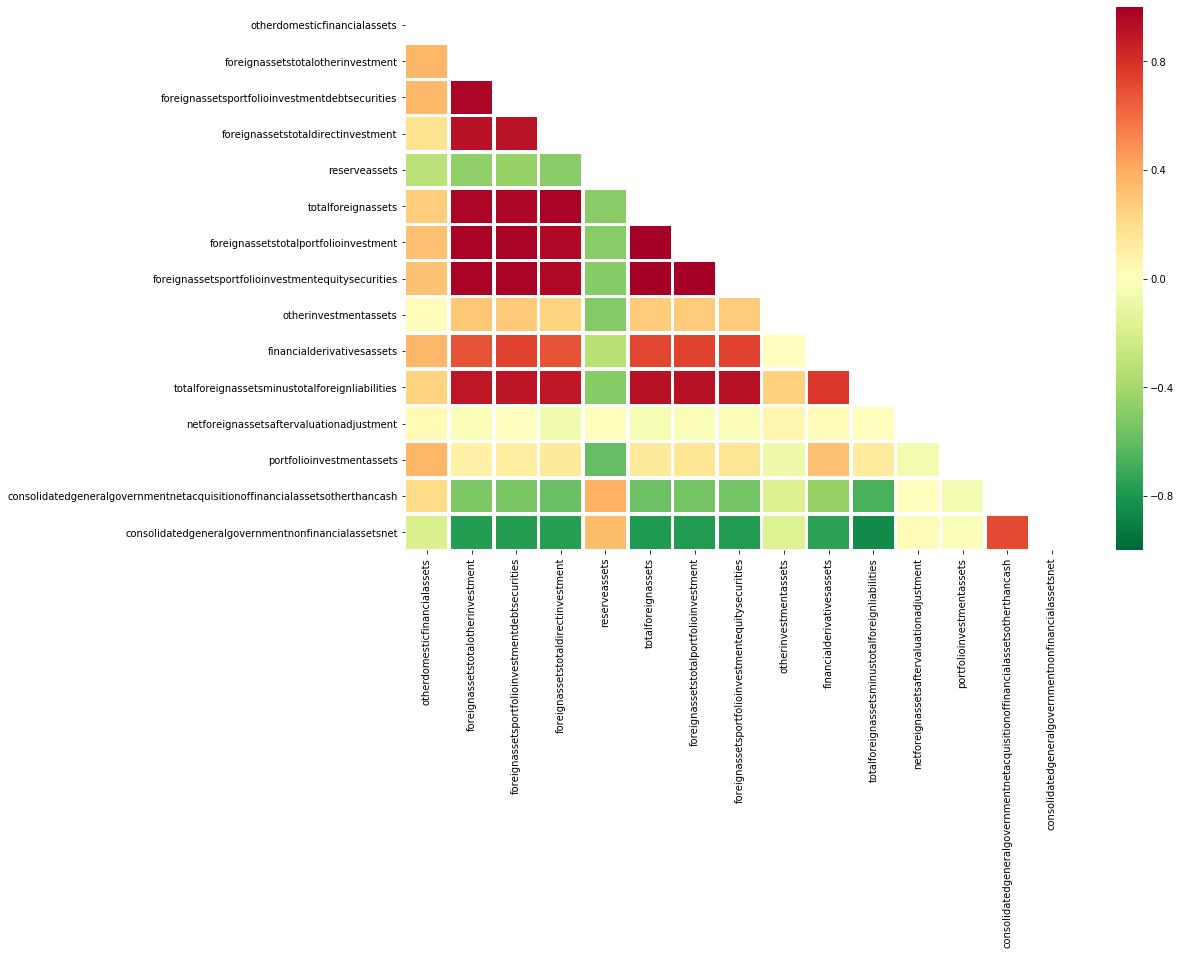

In [11]:
# df_inv = get_inv_features('evalua', 'nvest') 
# DF_INV = pd.DataFrame(data = df_inv)



# X_ASSETS = df_assets2.transpose()
# df2 = df2.rename(columns={'unemployment rate':'unemployment_rate'})
# y_inv = df2['unemployment_rate']
# X_INV.columns.tolist()

df_assets2 = df_assets2.T

df_assets2.append(x_values_ffill["unemployment rate"])
# df_assets2

for col in df_assets2.columns:
    new_w = wordopt(col)
    df_assets2.rename(columns= {col: new_w.replace(' ', '')}, inplace = True)

print(df_assets2.columns)

del df_assets2["otherreserveassets"]
corr_df = df_assets2.corr(method='pearson')

fig, ax = plt.subplots(figsize=(15,10))

mask=np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_df,cmap='RdYlGn_r',vmax=1.0,vmin=-1.0,mask=mask,linewidths=2.5,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

### 5.2 QUESTION 2 FEATURES: INVESTMENT RETURNS

In [12]:
df_inv = get_features('evalua', 'nvest') 
DF_INV = pd.DataFrame(data = df_inv)

Foreign liabilities: Total portfolio investment 
Foreign liabilities: Portfolio investment: Equity securities
Foreign liabilities: Portfolio investment: Debt securities
Net Investment Position
Foreign liabilities: Total other investment
Foreign assets: Total other investment
Foreign assets: Portfolio investment: Debt securities
The net borrowing requirement of national government equals the net result of the cash-flow deficit/surplus and the cost of revaluation of foreign loans at redemption. 
Foreign assets: Total direct investment
Other investment, liabilities
Foreign assets: Total portfolio investment
Foreign assets: Portfolio investment: Equity securities
Other investment, assets
Cost/profit of revaluation of foreign loans 
Portfolio investment, liabilities
Foreign liabilities: Total direct investment
Direct investment abroad
Portfolio investment, assets
Direct investment in reporting economy


In [13]:
X_INV= DF_INV.transpose()
df2 = x_values_ffill.rename(columns={'unemployment rate':'unemployment_rate'})
y_inv = df2['unemployment_rate']

In [14]:
for col in X_INV.columns:
    new_w = wordopt(col)
    X_INV.rename(columns= {col: new_w.replace(' ', '')}, inplace = True)
X_INV.columns

Index(['foreignliabilitiestotalportfolioinvestment',
       'foreignliabilitiesportfolioinvestmentequitysecurities',
       'foreignliabilitiesportfolioinvestmentdebtsecurities',
       'netinvestmentposition', 'foreignliabilitiestotalotherinvestment',
       'foreignassetstotalotherinvestment',
       'foreignassetsportfolioinvestmentdebtsecurities',
       'thenetborrowingrequirementofnationalgovernmentequalsthenetresultofthecashflowdeficitsurplusandthecostofrevaluationofforeignloansatredemption',
       'foreignassetstotaldirectinvestment', 'otherinvestmentliabilities',
       'foreignassetstotalportfolioinvestment',
       'foreignassetsportfolioinvestmentequitysecurities',
       'otherinvestmentassets', 'costprofitofrevaluationofforeignloans',
       'portfolioinvestmentliabilities',
       'foreignliabilitiestotaldirectinvestment', 'directinvestmentabroad',
       'portfolioinvestmentassets', 'directinvestmentinreportingeconomy'],
      dtype='object')

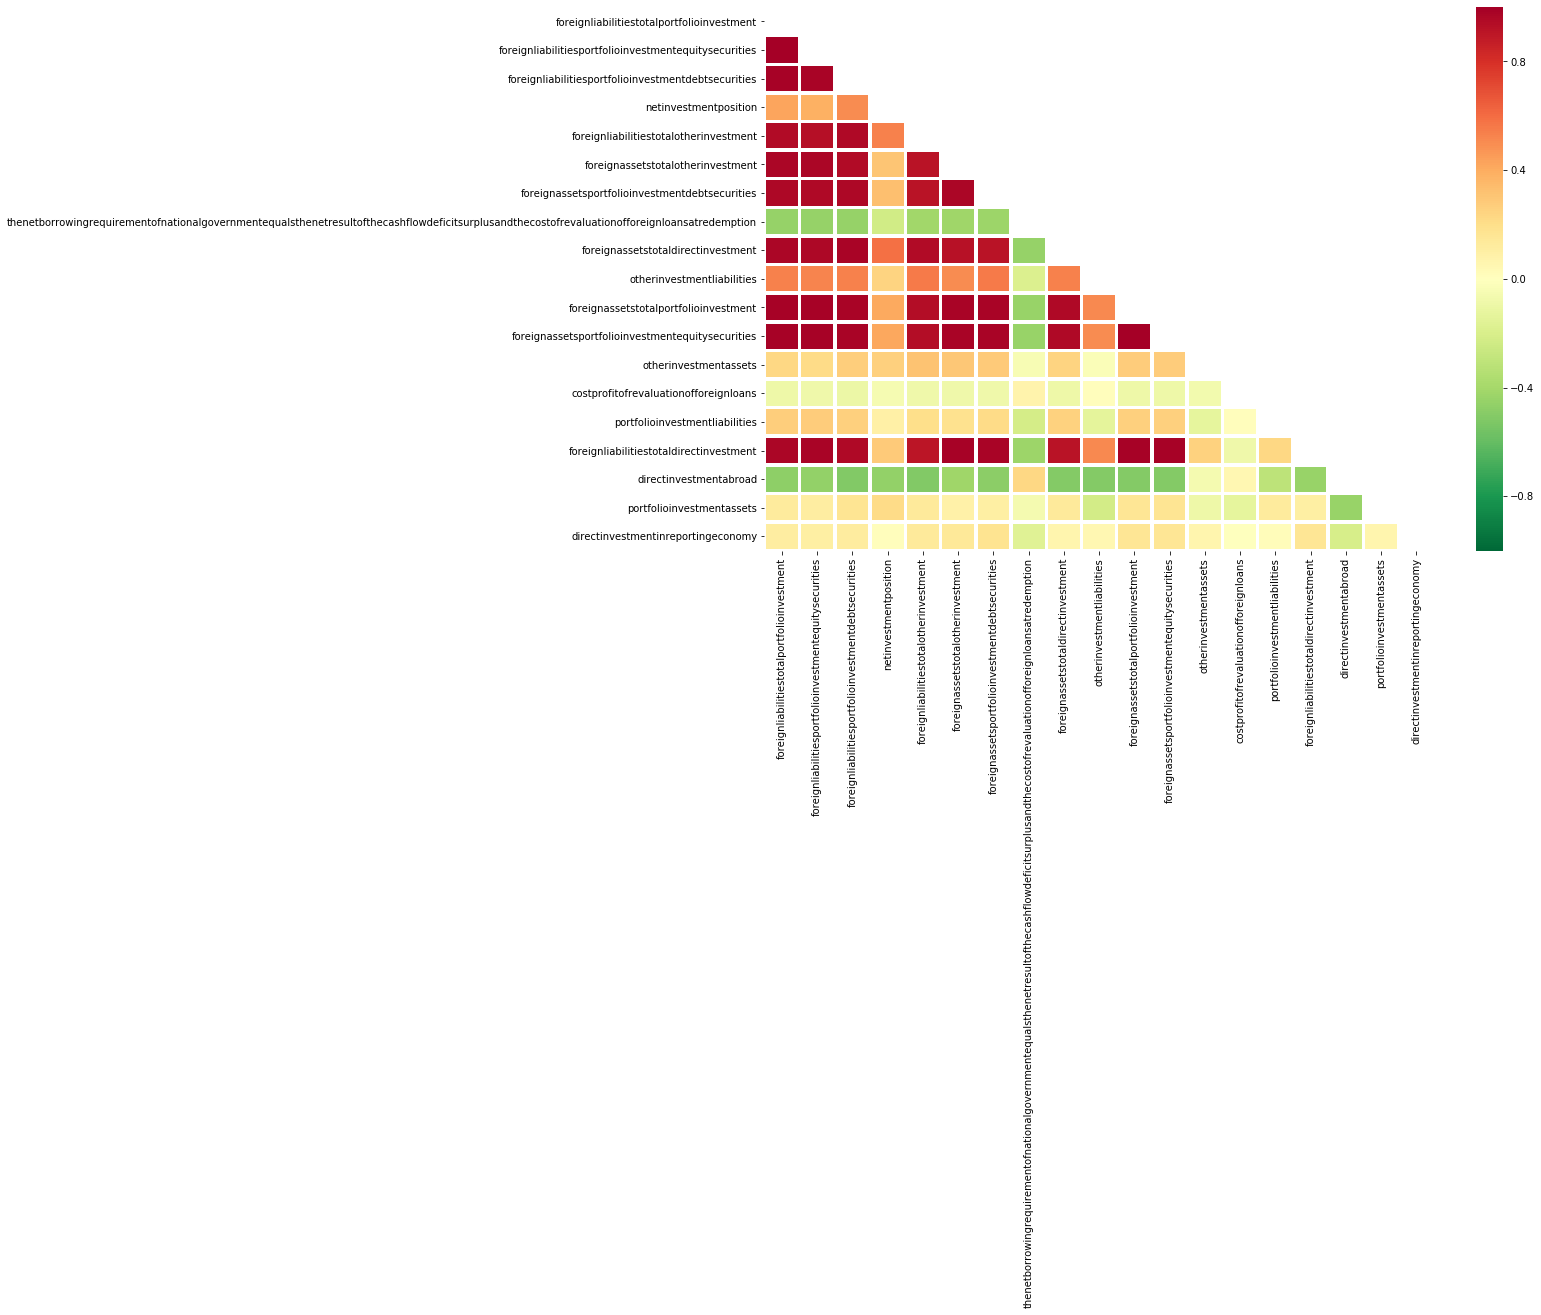

In [15]:
corr_df2 = X_INV.corr(method='pearson')

fig, ax = plt.subplots(figsize=(15,10))

mask=np.zeros_like(corr_df2)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_df2,cmap='RdYlGn_r',vmax=1.0,vmin=-1.0,mask=mask,linewidths=2.5,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

### 5.3 QUESTION 3 FEATURES: CASHFLOW

In [16]:
df_cash = get_features('cash', '') # get appropriate feature names
DF = pd.DataFrame(data = df_cash) # create a new dataset which only contains appropriate varibales that need to be reseache

Total cash-flow revenue
Cash received from the issuance of other debt instruments less cash payments made to redeem other debt instruments, including non-marketable bills and bonds, and debt of the former TBVC-countries, self-governing territories and the Republic of Namibia that were assumed by the national government. 
Consolidated general government: Net change in the stock of cash_x
Cash received from the issuance of domestic government bonds less cash payments made to redeem domestic government bonds.
The net borrowing requirement of national government equals the net result of the cash-flow deficit/surplus and the cost of revaluation of foreign loans at redemption. 
Cash received from the issuance of foreign bonds and loans less cash payments made to redeem foreign bonds and loans.
Cash received from the issuance of Treasury bills less cash payments made to redeem Treasury bills.
The difference between cash-flow revenue and cash-flow expenditure._x
The difference between cash-flo

In [17]:
DF= DF.transpose()
some_df = x_values_ffill.rename(columns={'unemployment rate':'unemployment_rate'})
y_inv = some_df['unemployment_rate']

In [18]:
for col in DF.columns:
    new_w = wordopt(col)
    DF.rename(columns= {col: new_w.replace(' ', '')}, inplace = True)
DF.columns

Index(['totalcashflowrevenue',
       'cashreceivedfromtheissuanceofotherdebtinstrumentslesscashpaymentsmadetoredeemotherdebtinstrumentsincludingnonmarketablebillsandbondsanddebtoftheformertbvccountriesselfgoverningterritoriesandtherepublicofnamibiathatwereassumedbythenationalgovernment',
       'consolidatedgeneralgovernmentnetchangeinthestockofcashx',
       'cashreceivedfromtheissuanceofdomesticgovernmentbondslesscashpaymentsmadetoredeemdomesticgovernmentbonds',
       'thenetborrowingrequirementofnationalgovernmentequalsthenetresultofthecashflowdeficitsurplusandthecostofrevaluationofforeignloansatredemption',
       'cashreceivedfromtheissuanceofforeignbondsandloanslesscashpaymentsmadetoredeemforeignbondsandloans',
       'cashreceivedfromtheissuanceoftreasurybillslesscashpaymentsmadetoredeemtreasurybills',
       'thedifferencebetweencashflowrevenueandcashflowexpenditurex',
       'thedifferencebetweencashflowrevenueandcashflowexpenditurey',
       'consolidatedgeneralgovernmentne

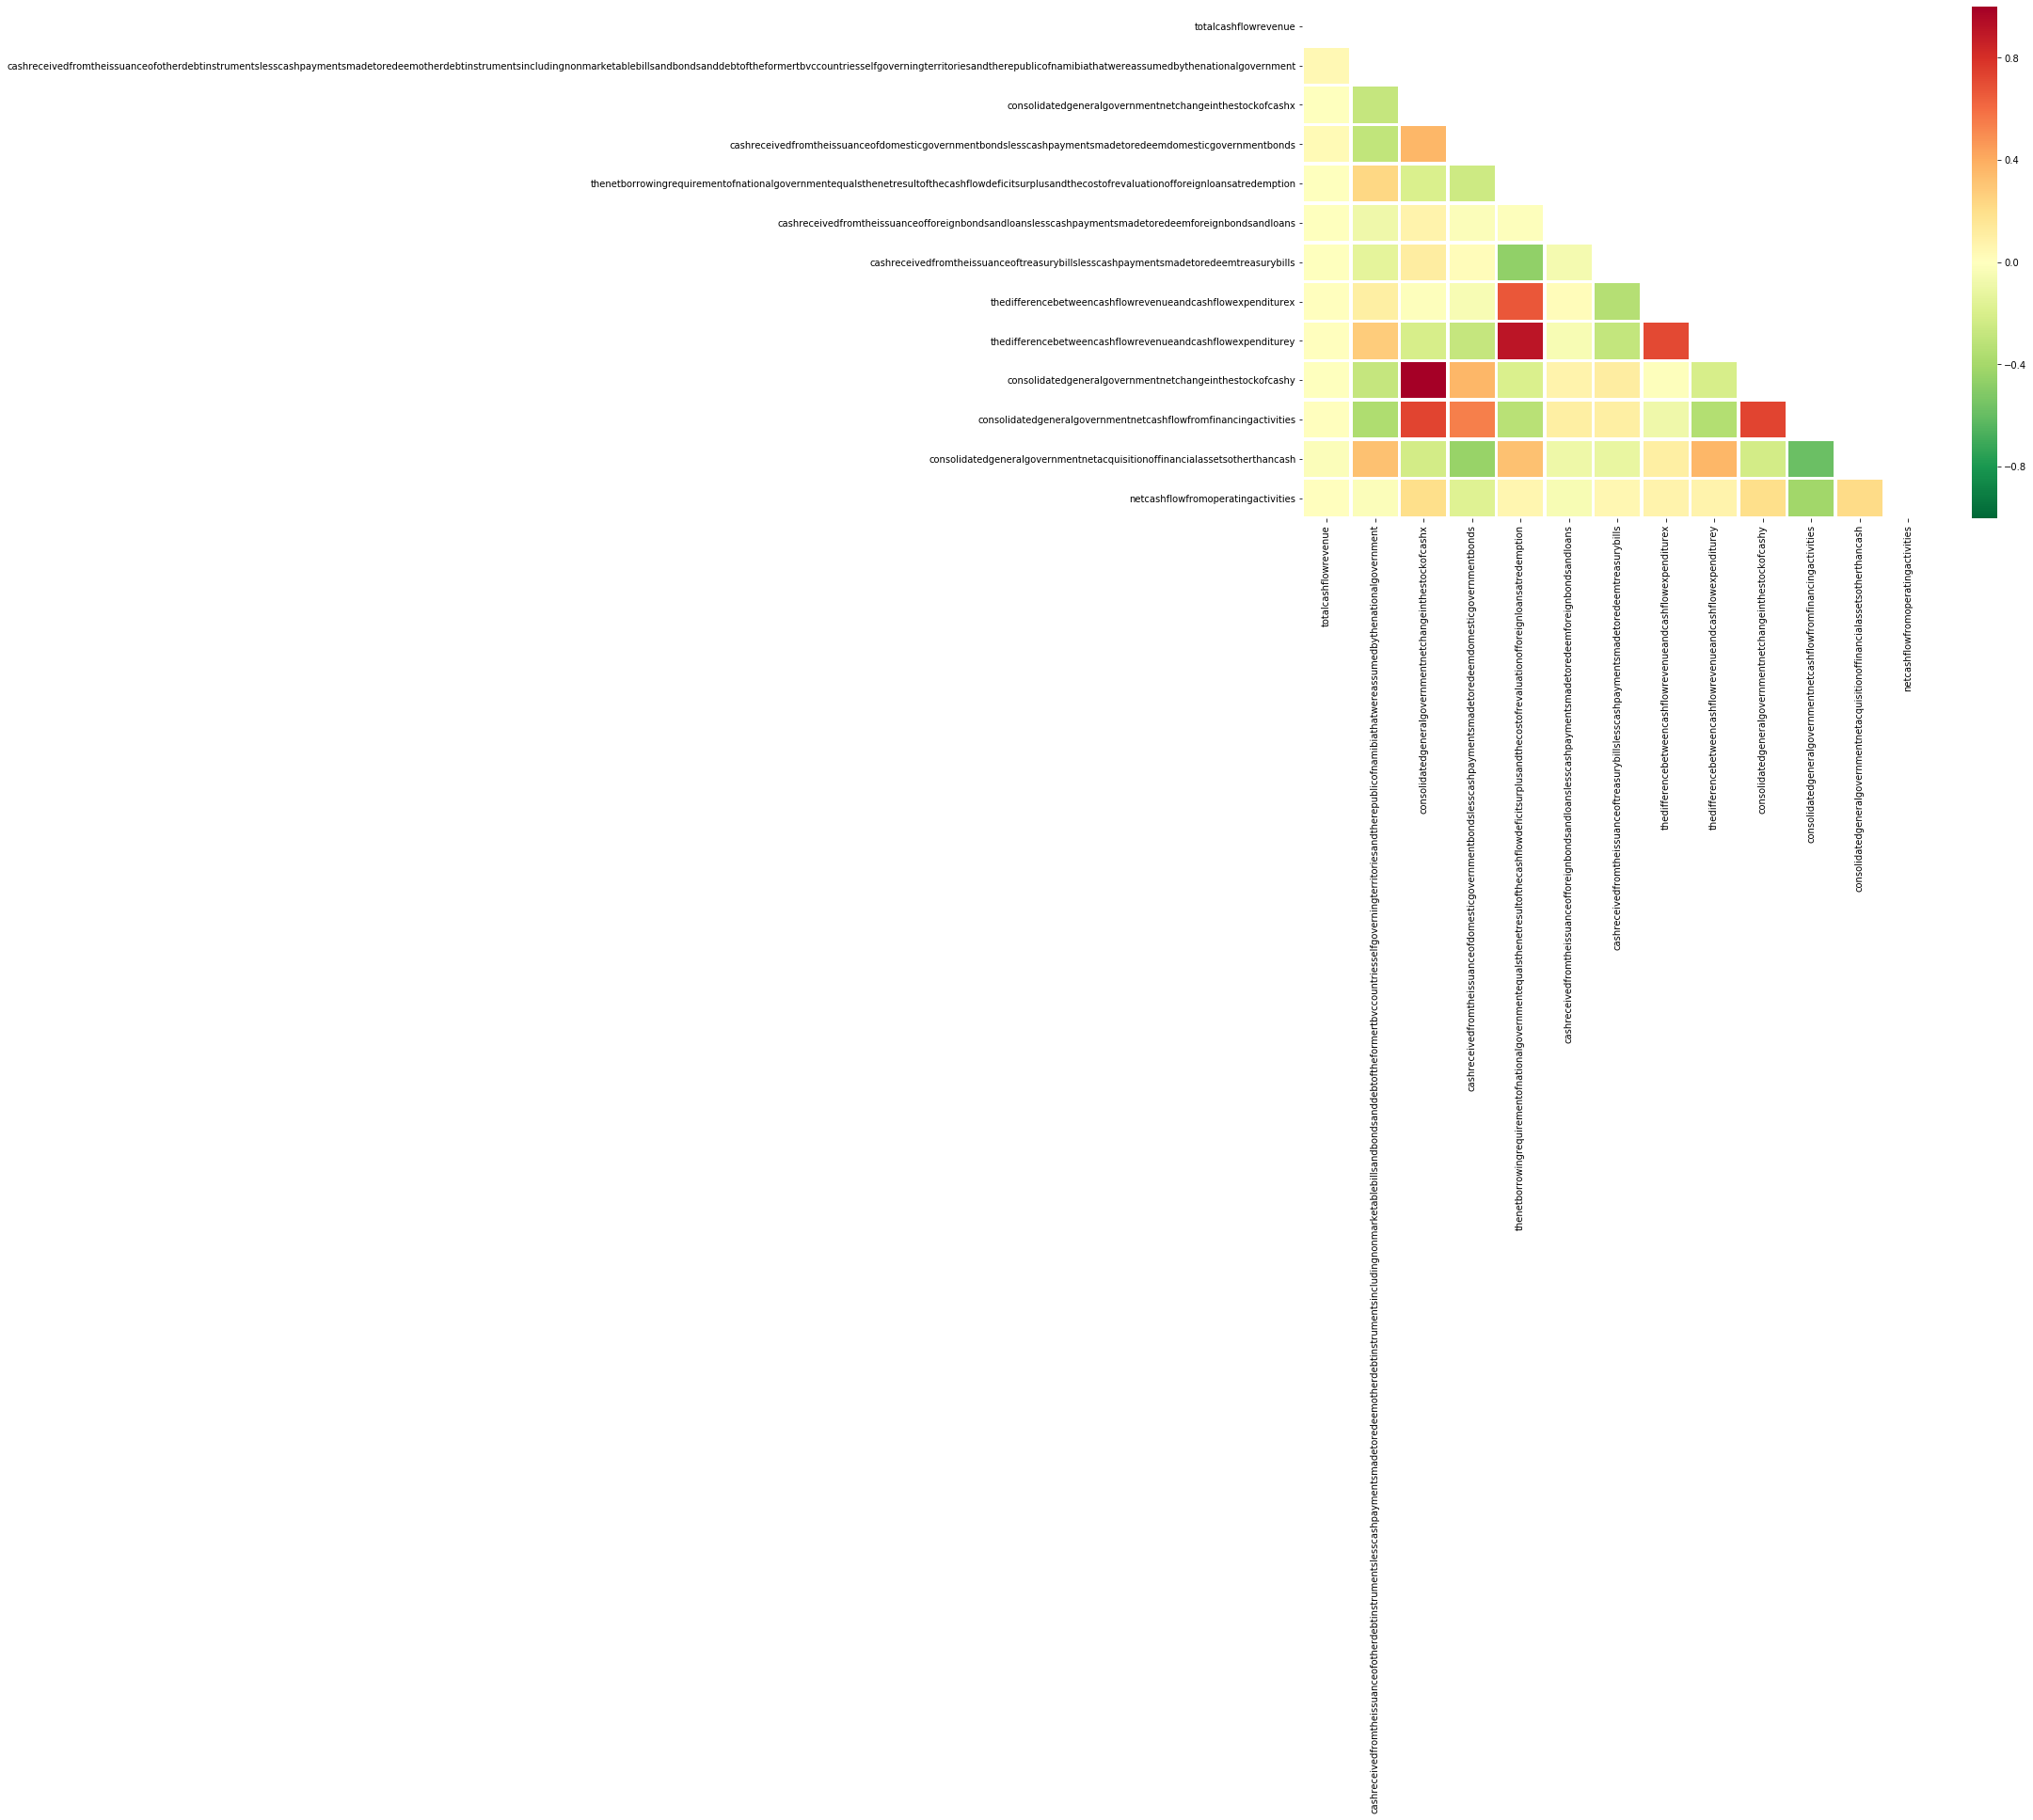

In [19]:
corr_df3 = DF.corr(method='pearson')

fig, ax = plt.subplots(figsize=(15,10))

mask=np.zeros_like(corr_df3)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_df3,cmap='RdYlGn_r',vmax=1.0,vmin=-1.0,mask=mask,linewidths=2.5,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

### 5.4 QUESTION 4 FEATURES: DEBT AND OUTSTANDING BALANCES

In [20]:
df_new_1 = get_features('debt', 'outstanding')
df_new_1 = pd.DataFrame(df_new_1)
df_new_1 = df_new_1.T

Foreign debt of S.A.: Total foreign debt 
Total outstanding domestic non-marketable bills 
Total gross loan debt (nsa) 
Total outstanding domestic non-marketable bonds
Cash received from the issuance of other debt instruments less cash payments made to redeem other debt instruments, including non-marketable bills and bonds, and debt of the former TBVC-countries, self-governing territories and the Republic of Namibia that were assumed by the national government. 
Total outstanding domestic non-marketable debt
Total outstanding domestic non-marketable debt
Total outstanding domestic marketable loan levies
Total outstanding domestic marketable bonds: Not exceeding 1 year (incl SA housing trust loans i.e marketable SP05 bonds)
Total outstanding domestic marketable bonds: Exceeding 1 but not 3 years
Total outstanding domestic marketable bonds: Total exceeding 10 years
Total outstanding domestic marketable debt 
Total outstanding domestic marketable debt 
Total outstanding domestic marketabl

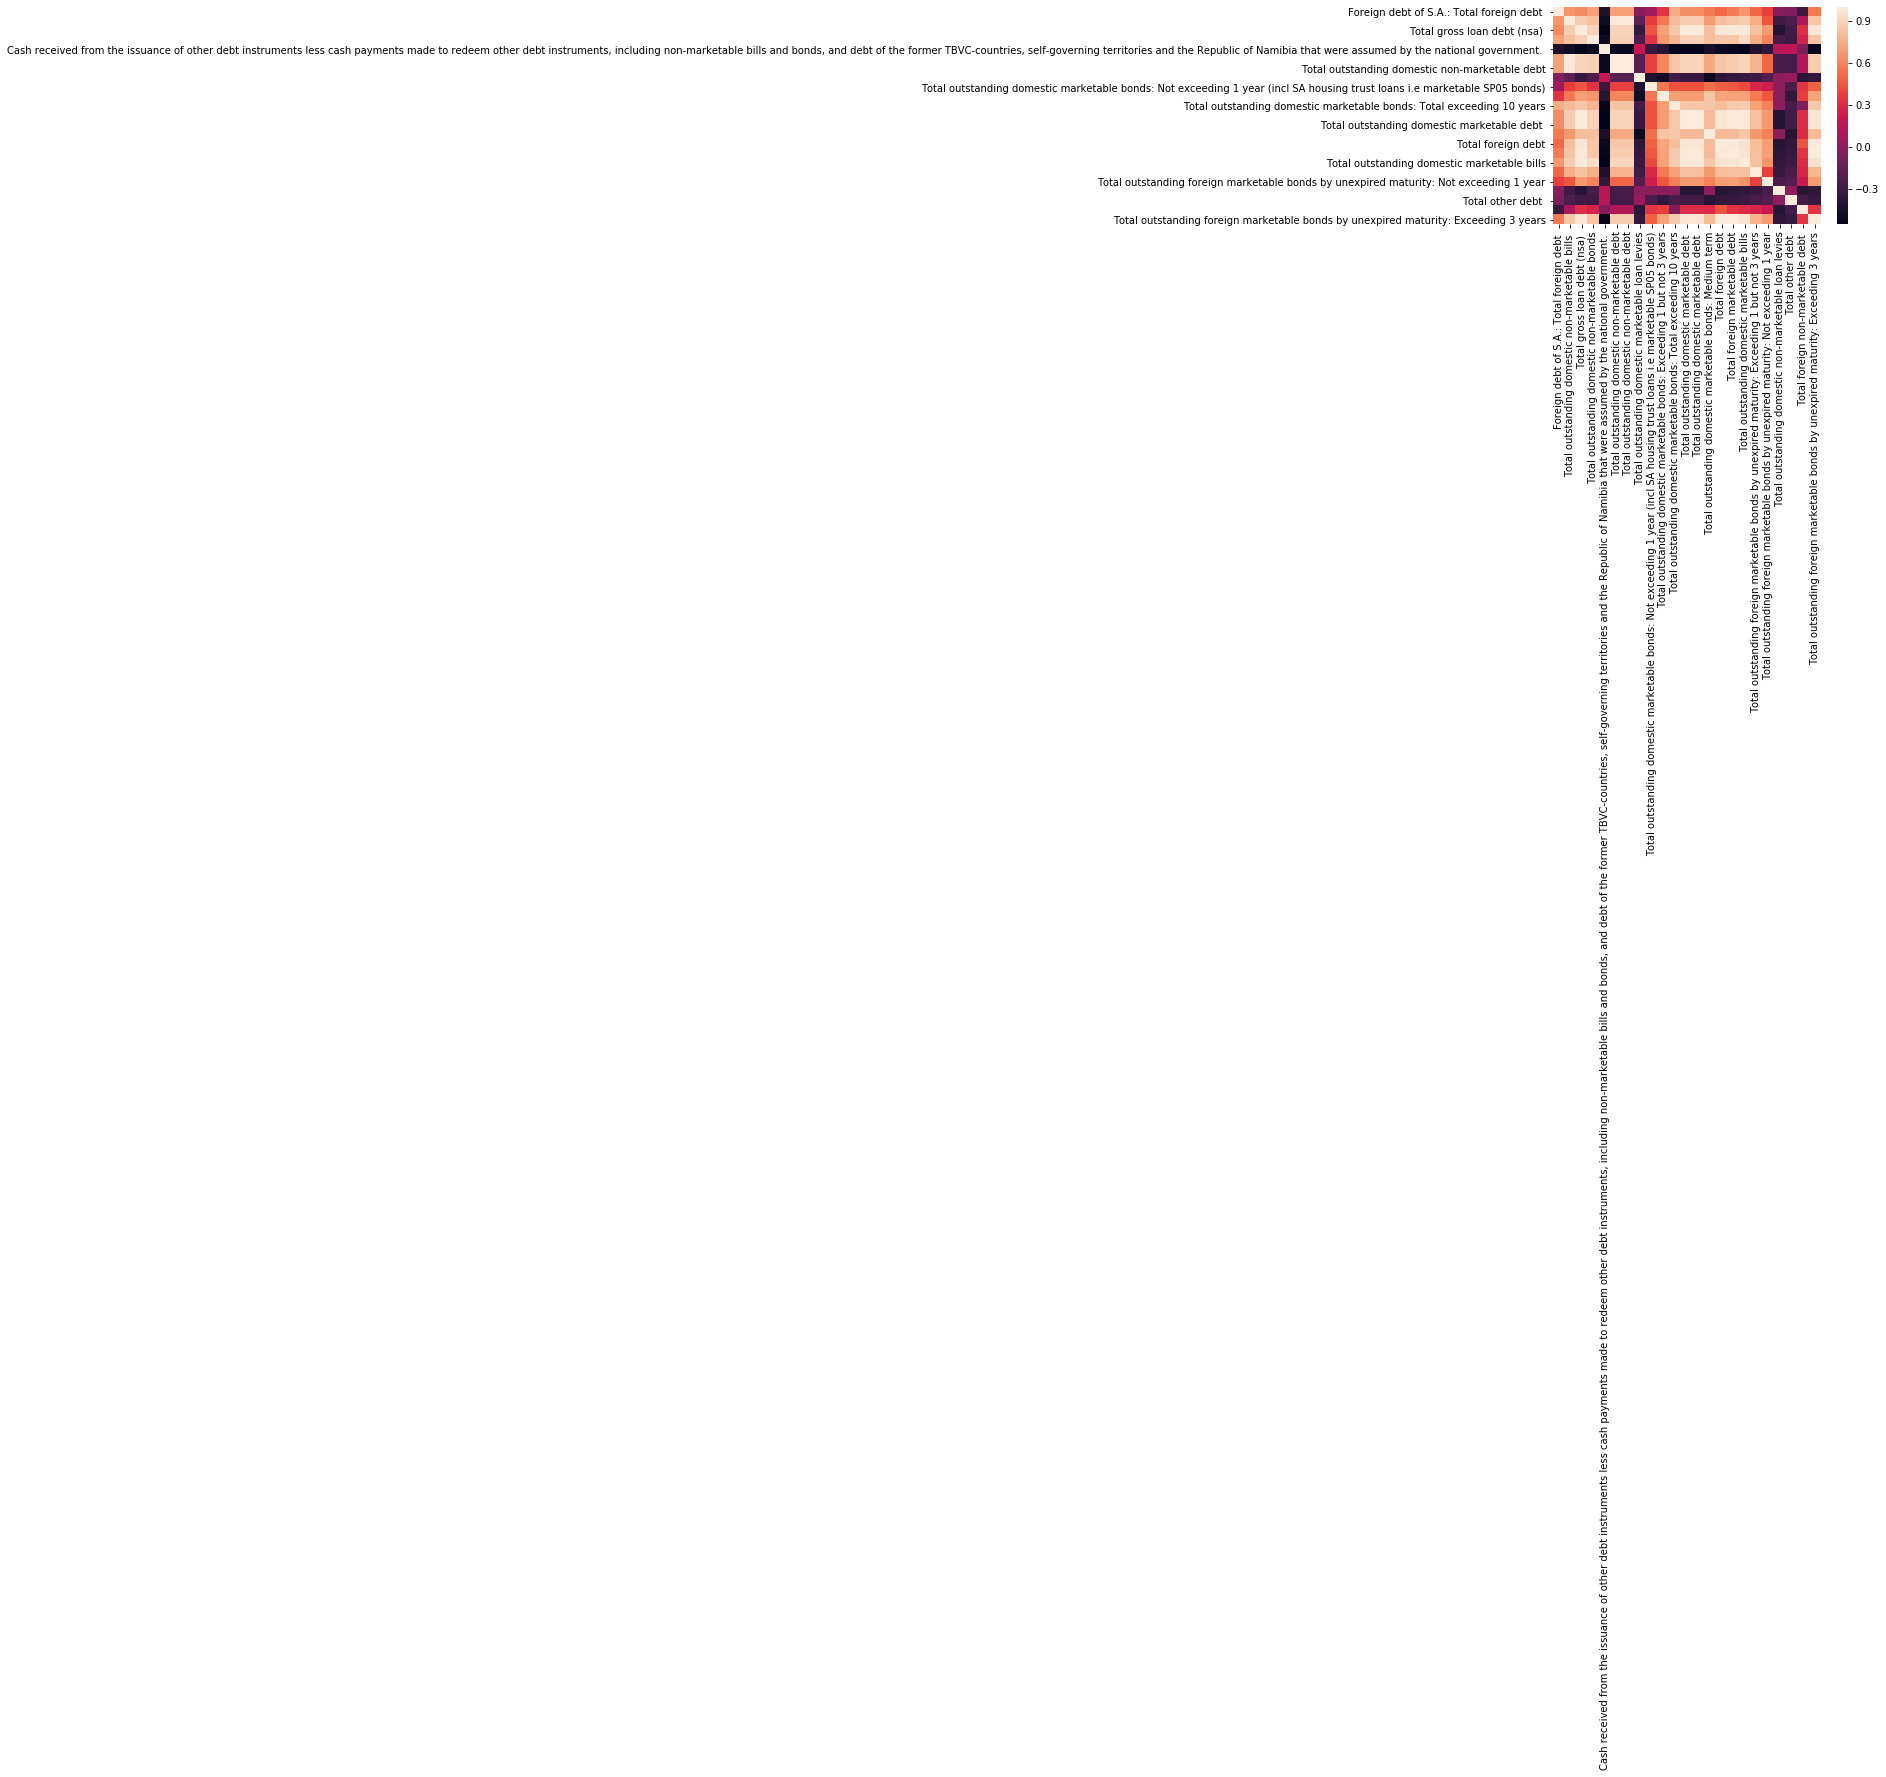

In [21]:
sns.heatmap(df_new_1.corr())

# 6. Model fitting: Unemployment rate in SA

## How does different economic factors affect Unemployment rate ?

The purpose of this notebook is to explore variables that could potetially have a relationship with our response variables, i.e unemployment rate.
<br>
<br>
We will first start of by exploring which varibles have a relationship with the unemployment rate then after use those variables to answer the following questions:
<br>
<br>
**Questions:**<br>
1. How does the government cash flow affect unemployment rate?
2. Do investment returns affect the employment rate?
3. How does the government assets affect unemployment rate?
4. How does the government debt affect unemployment rate?
<br>
<br>
We will explore this relationship using the regression slope test that has a regression line of the format:
<br>
$$
Y=\beta_{i} X \ for \ i = 0,1,2...m
$$
Where $X$ are the selected variables and $\beta_{i}$ are the respective coefficients.Thus, the **hypothesis** is as follows:
$$
\begin{array}{l}{\mathrm{H}_{\mathrm{0}} : \beta_{0}=\beta_{1}=...=\beta_{m}=0} \\ {\mathrm{H}_{\mathrm{1}} : \beta_{i} \neq 0 } \ for \ at \ least\ one \ i\end{array}
$$

<br>
<br>
We will be using the $F$-test to simultaneously check the significance of a number of regression coefficients.

##  6.1 How does the government assets affect unemployment rate?

###  Helper functions

These functions are common throughout the entire 4 models. 

Forward selection typically begins with only an intercept. One tests the various variables that may be relevant, and the ‘best’ variable where “best” is determined by some pre-determined criteria—is added to the model.<br>
As the model continues to improve (per that same criteria) we continue the process, adding in one variable at a time and testing at each step. Once the model no longer improves with adding more variables, the process stops. <br>

The Linear model function below is designed by Forward selection using the R2 score for measurement. **(Fill in here)**

In [22]:
def model_fit(X,y):
    
    """Linear model designed by forward selection.

    Parameters:
    -----------
    X: pandas DataFrame with all possible predictors and response

    y: decimal values, containing target variable

    Returns:
    --------
    score_list: a list containing the R2 coefficients of determining statistical 
    measure of how well the regression predictions approximate the real data points
           
    optimum_no_features: Variables with the optimum features
    
    """
    
    #no of features
    feature_list=np.arange(1, len(X.columns))            
    high_score=0
    #Variable to store the optimum features
    optimum_no_featurcashes=0           
    score_list =[]
    for n in range(len(feature_list)):
        model = LinearRegression()
        rfe = RFE(model,feature_list[n])
        X_train_rfe = rfe.fit_transform(X,y)
        model.fit(X_train_rfe,y)
        # R2 score for measurement
        score = r2_score(y, model.predict(X_train_rfe))
        score_list.append(score)
        
        if n % 10 == 0:
            print(n,score)
            
        if(score>high_score):
            high_score = score  
            optimum_no_features = feature_list[n]
    return score_list, optimum_no_features 

A function for R squared coefficient line graph plot

In [23]:
  """.

    Parameters:
    -----------
    values: list,R squared coefficient values
    title : string, title of the R squared coefficient plot 
    x_label: string, x-axis label
    y_label : string, y-axis label
    
    """

def plt_plot(values,title, x_label, y_label):
    
    plt.plot(values)
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)

In [24]:
   """Linear model designed by forward selection.

    Parameters:
    -----------
    optimum_no_features: pandas DataFrame with all possible predictors and response

    X_train: decimal values, containing target variable
    y_train:
    
    Returns:
    --------
    score_list: a list containing the R2 coefficients of determining statistical 
    measure of how well the regression predictions approximate the real data points
           
    optimum_no_features: Variables with the optimum features
    
    """



def final_model(optimum_no_features, X_train, y_train,cols):
    model = LinearRegression()
    #Initializing RFE model
    rfe = RFE(model, optimum_no_features)             
    #Transforming data using RFE
    x_fitted = rfe.fit_transform(X_train,y_train)  
    #Fitting the data to model
    model.fit(x_fitted,y_train)              
    temp = pd.Series(rfe.support_,index = cols)
    selected_features = temp[temp==True].index
    return selected_features, model, rfe

In [25]:
def print_p_values(x_test, y_test, predicted, params):
    """
    Calculates the p value, based on https://stackoverflow.com/a/42677750/9260653
    """
    newX = np.append(np.ones((len(x_test),1)), x_test, axis=1)
    MSE = (sum((y_test.values-predicted)**2))/(len(newX)-len(newX[0]))

    var_b = MSE*(np.linalg.pinv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)[:-1]
    ts_b = params/ sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,3)
    params = np.round(params,4)

    myDF3 = pd.DataFrame()
    myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["P-Values"] = [params,sd_b,ts_b,p_values]
    print(myDF3.iloc[1])

From exploratory analysis it appears most of the assets are positively correlated with unemployment rate, however, there is also strong correlation between some assets which may lead to problem of colinearity

#### Here I am separating features from the target variable

In [ ]:
X= df_assets2
df2 = y_values_ffill.rename(columns={'unemployment rate':'unemployment_rate'})

y = df2['unemployment_rate']

Earlier on, we saw that some of our fetaures we strongly correlated that could cause issue of multicollinearity, to resolve that, I shall optimize my feature space by removing features with correlation more than 0.8 .

In [27]:
correlated_features = set()
correlation_matrix = X.corr()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
len(correlated_features)


7

In [28]:
print(correlated_features)

{'foreignassetsportfolioinvestmentequitysecurities', 'foreignassetstotalportfolioinvestment', 'totalforeignassets', 'totalforeignassetsminustotalforeignliabilities', 'foreignassetsportfolioinvestmentdebtsecurities', 'consolidatedgeneralgovernmentnonfinancialassetsnet', 'foreignassetstotaldirectinvestment'}


In [29]:
X.drop(labels=correlated_features, axis=1, inplace=True)
X.shape

(794, 8)

Having obtained the optimized features, below we select them and in our new dataset and plot the correlation matrix.

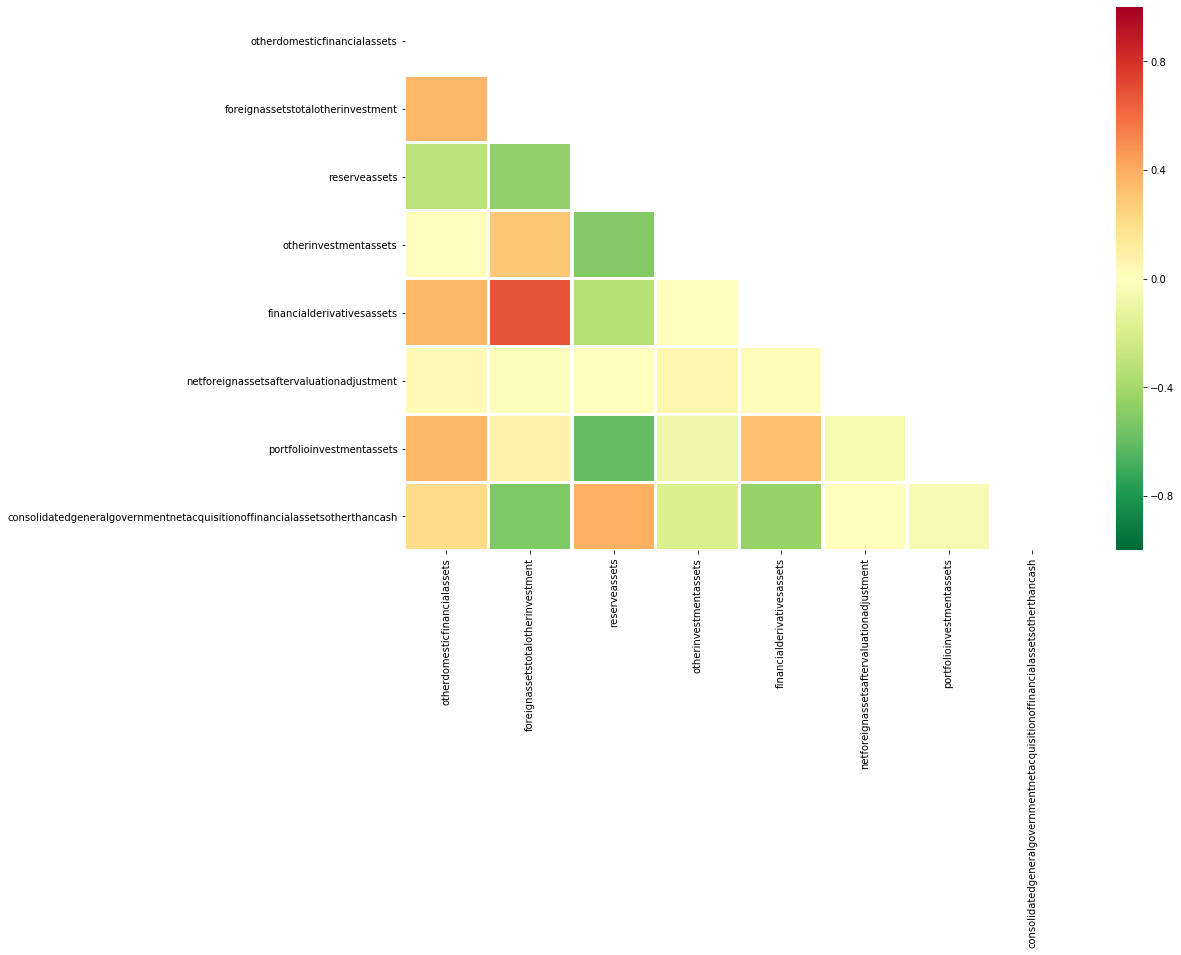

In [30]:
corr_df = X.corr(method='pearson')

fig, ax = plt.subplots(figsize=(15,10))


mask=np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_df,cmap='RdYlGn_r',vmax=1.0,vmin=-1.0,mask=mask,linewidths=2.5,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## Partitioning the Data into Training(70%) and Testing(30%) sets


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [32]:
X_train.head()

,otherdomesticfinancialassets,foreignassetstotalotherinvestment,reserveassets,otherinvestmentassets,financialderivativesassets,netforeignassetsaftervaluationadjustment,portfolioinvestmentassets,consolidatedgeneralgovernmentnetacquisitionoffinancialassetsotherthancash
Date,,,,,,,,
1976-08-01,-6629.442857,2.0,-3091.869216,-1558.928058,16261.892086,-77.0,-3364.971223,-8299.903509
1991-01-12,-6629.442857,7.0,88.000000,502.000000,0.000000,1601.0,-159.000000,-352.000000
1996-04-01,-6629.442857,18.0,-752.000000,-3779.000000,0.000000,-4505.0,-1575.000000,-359.000000
1976-01-06,-6629.442857,0.0,-3091.869216,-1558.928058,16261.892086,-243.0,-3364.971223,-8299.903509
2006-10-01,8839.000000,247.0,-7721.000000,3952.000000,0.000000,-17016.0,-4469.000000,-3485.000000


## Modelling phase

### The following function applies step wise linear regression fit to our model

In [33]:
scores_list, optimum_no_features = model_fit(X_train,y_train)
print(optimum_no_features)

0 0.4245171785921674
7


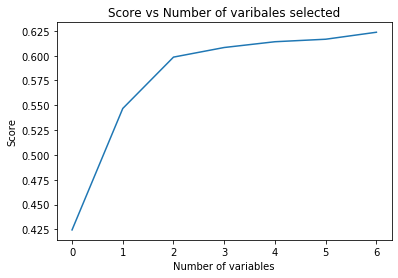

In [34]:
plt_plot(scores_list, 'Score vs Number of varibales selected','Number of variables', 'Score')

### Final model which utilizes optimum number of features, which were returned by the above function

In [35]:
cols_assets = list(X.columns)

selected_features, model, rfe = final_model(optimum_no_features, X_train, y_train,cols_assets)
print(selected_features)

Index(['otherdomesticfinancialassets', 'foreignassetstotalotherinvestment',
       'reserveassets', 'otherinvestmentassets', 'financialderivativesassets',
       'netforeignassetsaftervaluationadjustment',
       'consolidatedgeneralgovernmentnetacquisitionoffinancialassetsotherthancash'],
      dtype='object')


From our stepwise linear regression we have ended with 5 features only 1 redundant one was removed

Now model prediction

In [36]:
y_train_predicted = model.predict(rfe.transform((X_train)))

### Model Analysis


## Post-Stepwise Regression


### Residual analysis


In [37]:
residuals =y_train.astype(float)- (y_train_predicted)

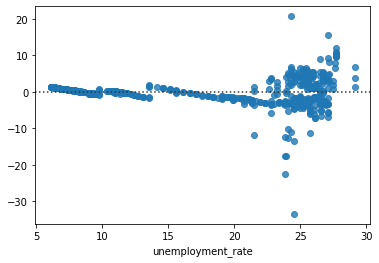

In [38]:
sns.residplot(y_train.astype(float),y_train_predicted)

In [39]:
import statsmodels.formula.api as sm

In [40]:
formula_features = ' + '.join(list(selected_features))
formula = 'unemployment_rate~'+ formula_features
formula

'unemployment_rate~otherdomesticfinancialassets + foreignassetstotalotherinvestment + reserveassets + otherinvestmentassets + financialderivativesassets + netforeignassetsaftervaluationadjustment + consolidatedgeneralgovernmentnetacquisitionoffinancialassetsotherthancash'

In [41]:
# Add y back to df

X_y_new_train = pd.concat([X_train,pd.DataFrame(y_train)], axis=1)

In [42]:
X_train_y_target = pd.concat([X_train, pd.DataFrame(y_train)], axis=1)
X_train_y_target.head()

,otherdomesticfinancialassets,foreignassetstotalotherinvestment,reserveassets,otherinvestmentassets,financialderivativesassets,netforeignassetsaftervaluationadjustment,portfolioinvestmentassets,consolidatedgeneralgovernmentnetacquisitionoffinancialassetsotherthancash,unemployment_rate
Date,,,,,,,,,
1976-08-01,-6629.442857,2.0,-3091.869216,-1558.928058,16261.892086,-77.0,-3364.971223,-8299.903509,6.13100
1991-01-12,-6629.442857,7.0,88.000000,502.000000,0.000000,1601.0,-159.000000,-352.000000,13.56330
1996-04-01,-6629.442857,18.0,-752.000000,-3779.000000,0.000000,-4505.0,-1575.000000,-359.000000,20.69500
1976-01-06,-6629.442857,0.0,-3091.869216,-1558.928058,16261.892086,-243.0,-3364.971223,-8299.903509,6.27541
2006-10-01,8839.000000,247.0,-7721.000000,3952.000000,0.000000,-17016.0,-4469.000000,-3485.000000,25.89860


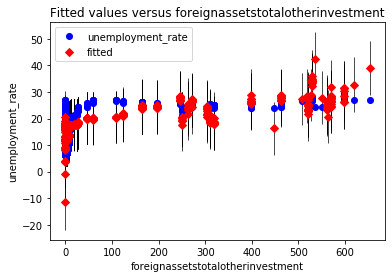

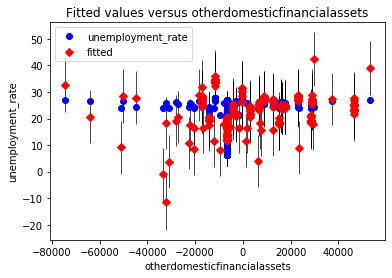

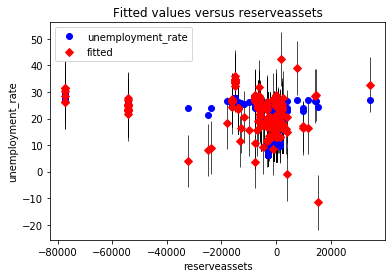

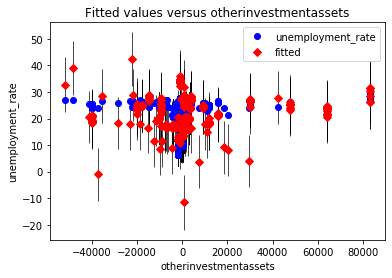

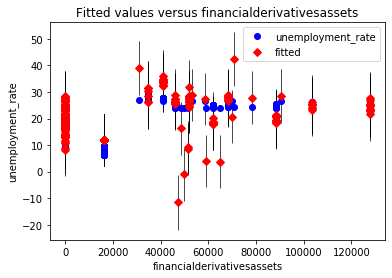

In [43]:
results = sm.ols(formula=formula,data = X_train_y_target).fit()
import statsmodels.graphics as smgraphics

axss = smgraphics.regressionplots.plot_fit(results, 2)
_ = smgraphics.regressionplots.plot_fit(results, 1)
_ = smgraphics.regressionplots.plot_fit(results, 3)
_ = smgraphics.regressionplots.plot_fit(results, 4)
_ = smgraphics.regressionplots.plot_fit(results, 5)

In [44]:
Y_ols_pred=results.predict(X_train)

In [45]:
residuals = y_train - Y_ols_pred


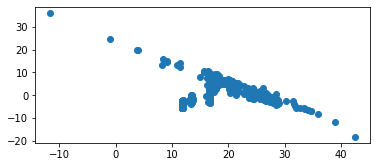

In [46]:
pred_val = results.fittedvalues.copy()
fig, ax = plt.subplots(figsize=(6,2.5))


_ = ax.scatter(pred_val, residuals)

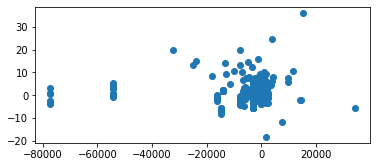

In [47]:
fig, ax1 = plt.subplots(figsize=(6,2.5))
_ = ax1.scatter(X_train.iloc[:,2:3], residuals)

#### Error distribution of residuals

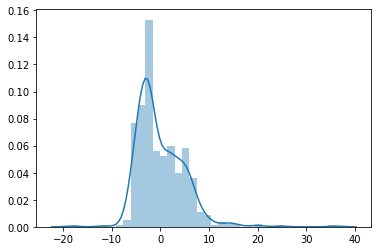

In [48]:
sns.distplot(residuals)

#### QQ plots of sample quantiles vs theoretical ones

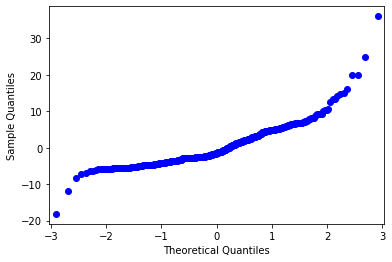

In [49]:
import statsmodels.api as sm
_ = sm.qqplot(residuals)

### Outlier removal


In [50]:
test = results.outlier_test()
outliers = ((x[i],y[i]) for i,t in enumerate(test) if t[2] < 0.5)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)


In [52]:
outliers =(i for i,t in enumerate(test.iloc[:,2]) if t < 0.5)

In [53]:
# Index of Outliers
outliers_list = list(outliers)

In [54]:
# Remove outliers
X_train = pd.DataFrame(np.delete(X_train.values, outliers_list,0))
y_train = pd.DataFrame(np.delete(y_train.values, outliers_list,0))
len(X_train)

549

## Final Model

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

final_model = rlm(formula, data=X_train_y_target,
                      M=sm.robust.norms.HuberT()).fit()

In [56]:
X_train.head()

,otherdomesticfinancialassets,foreignassetstotalotherinvestment,reserveassets,otherinvestmentassets,financialderivativesassets,netforeignassetsaftervaluationadjustment,portfolioinvestmentassets,consolidatedgeneralgovernmentnetacquisitionoffinancialassetsotherthancash
Date,,,,,,,,
1976-08-01,-6629.442857,2.0,-3091.869216,-1558.928058,16261.892086,-77.0,-3364.971223,-8299.903509
1991-01-12,-6629.442857,7.0,88.000000,502.000000,0.000000,1601.0,-159.000000,-352.000000
1996-04-01,-6629.442857,18.0,-752.000000,-3779.000000,0.000000,-4505.0,-1575.000000,-359.000000
1976-01-06,-6629.442857,0.0,-3091.869216,-1558.928058,16261.892086,-243.0,-3364.971223,-8299.903509
2006-10-01,8839.000000,247.0,-7721.000000,3952.000000,0.000000,-17016.0,-4469.000000,-3485.000000


In [57]:
final_model_predicted = final_model.predict(X_test)

In [58]:
params = np.array(final_model.params)

In [59]:
metrics.r2_score(y_test, final_model_predicted)

0.3379621831364742

In [60]:
print_p_values(X_test, y_test, final_model_predicted, params)


Coefficients      -0.0002
Standard Errors    0.0000
t values          -3.9730
P-Values           0.0000
Name: 1, dtype: float64


The test for $H_{0}$ by using the following statistic:
$$
F_{0} = \frac{MS_R}{MS_E}
$$
where $MS_R$ is the regression mean square and $MS_E$ is the error mean square.
<br>
The null hypothesis, $H_{0}$, is rejected if the calculated statistic. $f_{0}, is usch that$
$$
F_{0} > f
$$
I will now test my hypothesist using $F$

In [61]:
def fstat_test(final_model):
    A = np.identity(len(final_model.params))
    A = A[1:,:]
    fvalue = final_model.f_test(A).fvalue
    print("The fvalue is " + str(fvalue[0][0]))

In [62]:
fstat_test(final_model)

The fvalue is 596.4326285785631


In [63]:
degresOfFreedom = len(X_train) - (len(X_train.columns)+1)
scipy.stats.f.ppf(q=1-0.05, dfn=2, dfd=degresOfFreedom)

3.0122292124661048

As shown above, $F_{0} = 110.5337$ and $f = 3.0121$.
<br>
<br>
Since $F_0$ > $f$, $H_{0}$ is rejected and it is concluded that at least one $\beta_{i}$ cofficient is significant. In other words, it is concluded that a regression model exists between the exploratory and response variables

# 6.2 Unemployement rate in SA: Investigating the relationship between governments profits/losses on investments and unemployment rate in South Africa

###  Do investment returns affect the employment rate?

We are going to removr investment features with correlation scores of over 70 percent

In [ ]:
correlated_features = set()
correlation_matrix = X_INV.corr()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
len(correlated_features)

In [ ]:
X_INV.drop(labels=correlated_features, axis=1, inplace=True)
X_INV.shape

In [90]:

X_train_inv, X_test_inv, y_train_inv, y_test_inv = train_test_split(X_INV,y_inv, test_size = 0.3, random_state = 0)
X_train_inv.head()

,foreignliabilitiestotalportfolioinvestment,netinvestmentposition,thenetborrowingrequirementofnationalgovernmentequalsthenetresultofthecashflowdeficitsurplusandthecostofrevaluationofforeignloansatredemption,otherinvestmentliabilities,otherinvestmentassets,costprofitofrevaluationofforeignloans,portfolioinvestmentliabilities,directinvestmentabroad,portfolioinvestmentassets,directinvestmentinreportingeconomy
Date,,,,,,,,,,
1976-08-01,3.0,-14.0,-73.0,5737.884892,-1558.928058,0.0,14270.532374,-4247.640288,-3364.971223,5791.309353
1991-01-12,28.0,-37.0,1686.0,-72.000000,502.000000,0.0,887.000000,-641.000000,-159.000000,-508.000000
1996-04-01,112.0,-132.0,-3464.0,10757.000000,-3779.000000,0.0,-516.000000,-1278.000000,-1575.000000,1296.000000
1976-01-06,0.0,0.0,-26.0,5737.884892,-1558.928058,0.0,14270.532374,-4247.640288,-3364.971223,5791.309353
2006-10-01,716.0,-459.0,-4445.0,2371.000000,3952.000000,-540.0,31519.000000,5980.000000,-4469.000000,-10447.000000


In [67]:
def invest_model_fit(X_fit,y_fit):    
    feature_list=np.arange(1, len(X_train_inv.columns))            
    high_score=0
    optimum_no_features=0           
    score_list =[]
    for n in range(len(feature_list)):
        model = LinearRegression()
        rfe = RFE(model,feature_list[n])
        X_train_rfe = rfe.fit_transform(X_train_inv,y_train_inv)
        model.fit(X_train_rfe,y_train_inv)

        score = r2_score(y_fit, model.predict(X_train_rfe))
        score_list.append(score)

        if(score>high_score):
            high_score = score  
            optimum_no_features = feature_list[n]
    return score_list, optimum_no_features 


In [68]:
scores_list_inv, optimum_no_features_inv = invest_model_fit(X_train_inv,y_train_inv)
print("Number of features selected:",optimum_no_features_inv)

Number of features selected: 9


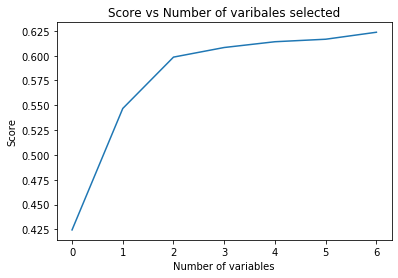

In [69]:
plt_plot(scores_list, 'Score vs Number of varibales selected','Number of variables', 'Score')

The r squared scores seem to be increasing for the selected investment features. The scores remain less that 0.4 probably because of the small number of features used

In [70]:
def final_inv_model(n, X_final_inv, y_final_inv):
    cols = list(X_INV.columns)
    model = LinearRegression()
    #Initializing RFE model
    rfe = RFE(model, n)             
    #Transforming data using RFE
    x_fitted = rfe.fit_transform(X_final_inv,y_final_inv)  
    #Fitting the data to model
    model.fit(x_fitted,y_final_inv)              
    temp = pd.Series(rfe.support_,index = cols)
    selected_features = temp[temp==True].index
    return selected_features, model, rfe

In [71]:
print(optimum_no_features_inv)
selected_inv_features, inv_model, inv_rfe = final_inv_model(optimum_no_features_inv, X_train_inv, y_train_inv)
selected_inv_features.tolist()

9


['foreignliabilitiestotalportfolioinvestment',
 'netinvestmentposition',
 'otherinvestmentliabilities',
 'otherinvestmentassets',
 'costprofitofrevaluationofforeignloans',
 'portfolioinvestmentliabilities',
 'directinvestmentabroad',
 'portfolioinvestmentassets',
 'directinvestmentinreportingeconomy']

In [72]:
y_train_inv_predicted = inv_model.predict(inv_rfe.transform((X_train_inv)))

## Residual Analysis

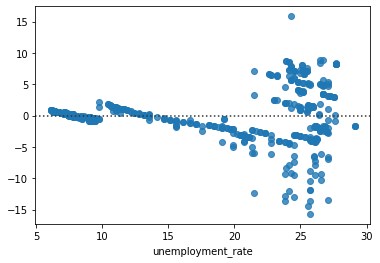

In [73]:
inv_residuals =y_train_inv.astype(float)- (y_train_inv_predicted)
sns.residplot(y_train_inv.astype(float),y_train_inv_predicted)

The residual points are not evenly dustributed vertically. The predictions get worse as the unemployment rate increases. The residuals show heteroscedasticity pattern which happens when regression assumes that the residuals come data with constant variance. This resuslts in low confidence in the model.

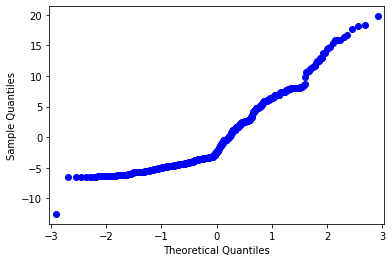

In [74]:
import statsmodels.api as sm
_ = sm.qqplot(inv_residuals)

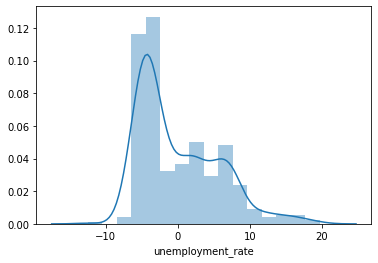

In [75]:
sns.distplot(inv_residuals)

The residuals are not normally distributed

In [76]:
formula_inv_features = ' + '.join(list(selected_inv_features))
formula_inv = 'unemployment_rate~'+ formula_inv_features

In [77]:
X_y_new_inv_train = pd.concat([X_train_inv,pd.DataFrame(y_train_inv)], axis=1)

In [78]:
X_train_y_target_INV = pd.concat([X_train_inv, pd.DataFrame(y_train_inv)], axis=1)

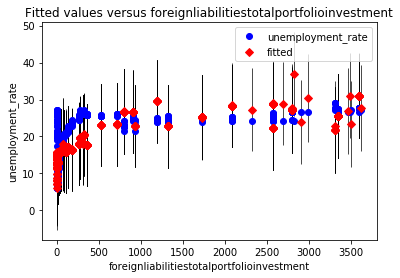

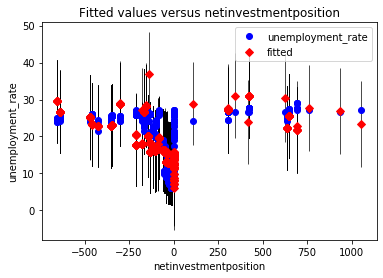

In [79]:
import statsmodels.formula.api as sm
results = sm.ols(formula=formula_inv,data = X_train_y_target_INV).fit()
import statsmodels.graphics as smgraphics

axss = smgraphics.regressionplots.plot_fit(results, 1)
_ = smgraphics.regressionplots.plot_fit(results, 2)

# Final Investment Model

In [80]:
import statsmodels.api as sm
final_inv_model = rlm(formula_inv, data=X_train_y_target_INV,
                      M=sm.robust.norms.HuberT()).fit()

In [81]:
final_inv_model_predicted = final_inv_model.predict(X_test_inv)
inv_params = np.array(final_inv_model.params)
print(inv_params.shape)
print(X_test_inv.shape)
metrics.r2_score(y_test_inv, final_inv_model_predicted)

(10,)
(239, 10)


0.4056319938200319

In [82]:
def print_p_values_inv(x_test, y_test, predicted, params):
    """
    Calculates the p value, based on https://stackoverflow.com/a/42677750/9260653
    """
    newX = np.append(np.ones((len(x_test),1)), x_test, axis=1)
    MSE = (sum((y_test.values-predicted)**2))/(len(newX)-len(newX[0]))

    var_b = MSE*(np.linalg.pinv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)[:-1]
    print(params.shape)
    ts_b = params/ sd_b
    
    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,4)
    params = np.round(params,4)

    myDF3 = pd.DataFrame()
    myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["P-Values"] = [params,sd_b,ts_b,p_values]
    print(myDF3.iloc[1])

In [83]:
# inv_params.shape
print_p_values_inv(X_test_inv, y_test_inv, final_inv_model_predicted, inv_params)


(10,)
Coefficients        0.0088
Standard Errors     0.0010
t values           12.6690
P-Values            0.0000
Name: 1, dtype: float64


In [84]:
def fstat_test(final_model):
    A = np.identity(len(final_model.params))
    A = A[1:,:]
    fvalue = final_model.f_test(A).fvalue
    print("The f value is " + str(fvalue[0][0]))

In [85]:
fstat_test(final_inv_model)
degresOfFreedom = len(X_train_inv) - (len(X_train_inv.columns)+1)
scipy.stats.f.ppf(q=1-0.05, dfn=2, dfd=degresOfFreedom)

The f value is 101.95850718620116


3.012290086049356

With a p-value 0f less than 0.01 and f value = 101.95 greater than f = 3.012 showing high significance, we can reject the hypothesis that investment has an effect on unemployment rate.

# 6.3 Unemployement rate in SA: Exploring the multi-variables of cash flow in South Africa that affects the rate of unemployement

### How does the government cash flow affect unemployment rate?

In [91]:
X_cash = DF.transpose() # transpose the data to be in a correct form

## Emperical Analysis

In this section I will be analysing the features that are going to be used to model the subsdiary question

In [92]:
correlation = X_cash.corr()

In [93]:
ax = plt.subplots(figsize=(25,25))
ax = sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True)

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000029F970B7400> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000029F970C4F28> (for post_execute):


KeyboardInterrupt: 

In [89]:
sns.pairplot(X_cash)

KeyboardInterrupt: 

## Dealing with Collinearity
Below I omitthe offending variables using the dimensionality reduction. This done to avoid collinearity from reducing the precision of the estimated coefficients, which weakens the statistical power of your regression model

In [ ]:
threshhold = 0.5 # the threshhold that is used to select features
correlated_features_cash = set() # a set which stores features that are available after dealing with collinearity
correlation_matrix_cash = X_cash.corr() # getting th correlation of the features

for i in range(len(correlation_matrix_cash.columns)): # loop through the features
    for j in range(i):
        if abs(correlation_matrix_cash.iloc[i, j]) > threshhold: # detecting all features that have correlation less greater than 0.5
            colname = correlation_matrix_cash.columns[i] # selecting features with less correlation
            correlated_features_cash.add(colname) # creating new dataset with no high correlated variables
len(correlated_features_cash) # the remaining features


## Removing spaces from the varibales (Data wrangling maybe???)
This is done to make it easier work with columns name

In [ ]:
for col in X_cash.columns: #selecting the features 
    new_w = wordopt(col) #removing all unnecesary characters
    X_cash.rename(columns= {col: new_w.replace(' ', '')}, inplace = True) # removing spaces from columns names

Y_cash = df2['unemployment_rate'] # removing space from target variblles


### Data splitting

The predefined ratio used for data splitting is 70/30 reason being that I want to improve the accuracy of the evaluation of the model.


In [ ]:
X_train_cash, X_test_cash, y_train_cash, y_test_cash = train_test_split(X_cash,Y_cash, test_size = 0.3, random_state = 0) # splitting datset into 70/30 ratio using sklearn

## Modeling - Stepwise regression

In this section I employ procedures to search through the model space to select a model. In other words,it is an iterative construction procedure of a regression model that involves the selection of independent variables to be used in a final model

In [ ]:
scores_list_cash, optimum_no_features_cash = model_fit(X_train_cash,y_train_cash)

In [ ]:
plt_plot(scores_list_cash, 'Score vs Number of varibales selected','Number of variables', 'Score')

## Forward selection feature selection
This is how the following methods behaves, at first it begins with no variables in the model, tests each variable as it is added to the model, then keeps those that are deemed most statistically significant—repeating the process until the results are optimal

In [ ]:
# fit final model using optimum number of features from prev function
"""final_model_cash :Linear model designed by forward selection.

    Parameters:
    -----------
    X_train: pandas DataFrame with all the explaratory variables

    y_train: pandas Series, series of response variable

    Returns:
    --------
    selected_features_cash: number of selectedinput features
    
    model: linear regression model
    
    rfe: gives the ranking of all the variables, 1 being most important.
    """

def final_model_cash(optimum_no_features, X_train, y_train):
    cols = list(X_cash.columns)
    model = LinearRegression()
    #Initializing RFE model
    rfe = RFE(model, optimum_no_features)  # RFE method takes the model to be used and the number of required features as input          
    x_fitted = rfe.fit_transform(X_train,y_train)   #Transforming data using RFE
    #Fitting the data to model
    model.fit(x_fitted,y_train)              
    temp = pd.Series(rfe.support_,index = cols)
    selected_features = temp[temp==True].index
    return selected_features, model, rfe

Fitting linear model to select features for the model using forward selection

In [ ]:
selected_features_cash, model_cash, rfe_cash = final_model_cash(optimum_no_features_cash, X_train_cash, y_train_cash)

using training features to predict the model

In [ ]:
y_train_predicted_cash = model_cash.predict(rfe_cash.transform((X_train_cash))) #using training features to predict the model

## Model Fit Analaysis

# Post-Stepwise Regression

## Residual Analysis
Here I use the resudual analysis for validating the regression model. If the dots are randomly dispersed around the horizontal axis then a linear regression model is appropriate for the data.

In [ ]:
residuals = y_train_cash-y_train_predicted_cash # calculating the residual of the  target variable foir training

In [ ]:
sns.residplot(y_train_cash,y_train_predicted_cash) #plotting the residual plot

### applying normal probability plot to assess how the data (error) depart from normality visually:


creating formula of the selected features for linear regression model

In [ ]:
# creating formula of the selected features for linear regression model
formula_features_cash = ' + '.join(list(selected_features_cash)) # selected features formula
formula_cash = 'unemployment_rate~'+ formula_features_cash # target feature formula

?? not sure

In [ ]:
# Add y back to df
X_y_new_train_cash = pd.concat([X_train_cash,pd.DataFrame(y_train_cash)], axis=1)


In [ ]:
X_train_y_target_cash = pd.concat([X_train_cash, pd.DataFrame(y_train_cash)], axis=1)
# X_train_y_target

Here I plot the model for the features selected above

In [ ]:
import statsmodels.graphics as smgraphics
import statsmodels.formula.api as sm

results_cash = sm.ols(formula=formula_cash,data = X_train_y_target_cash).fit() # fitting linear regression
axss_cash = smgraphics.regressionplots.plot_fit(results_cash,3) # plotting regression plot for feature 3


The above plot regression plot of feature 3, **consolodated general government change in the stock cach**

In [ ]:
Y_ols_pred_cash=results_cash.predict(X_train_cash)

In [ ]:
residuals_cash = y_train_cash - Y_ols_pred_cash


In [ ]:
fig, ax1 = plt.subplots(figsize=(6,2.5))
_ = ax1.scatter(X_train_cash.iloc[:,5:6], residuals_cash)

In [ ]:
sns.distplot(residuals)

In [ ]:
import statsmodels.api as sm
_ = sm.qqplot(residuals_cash)

### Outlier Detection and removal
Here outliers are detected and deleted and used the remaining observations for fitting the model.

In [ ]:
test_cash = results.outlier_test()
outliers_cash = ((x[i],y[i]) for i,t in enumerate(test) if t[2] < 0.5)

In [ ]:
X_train_cash, X_test_cash, y_train_cash, y_test_cash = train_test_split(X_cash,Y_cash, test_size = 0.3, random_state = 0)


In [ ]:
outliers_cash =(i for i,t in enumerate(test.iloc[:,2]) if t < 0.5)

In [ ]:
# Index of Outliers
outliers_list_cash = list(outliers)


In [ ]:
# Remove outliers
X_train_cash = pd.DataFrame(np.delete(X_train_cash.values, outliers_list_cash,0))
y_train_cash = pd.DataFrame(np.delete(y_train_cash.values, outliers_list_cash,0))


## Final Model


In [ ]:
X_train_cash, X_test_cash, y_train_cash, y_test_cash = train_test_split(X_cash,Y_cash, test_size = 0.3, random_state = 0)

final_model_cash = rlm(formula_cash, data=X_train_y_target_cash,
                      M=sm.robust.norms.HuberT()).fit()

In [ ]:
final_model_predicted_cash = final_model_cash.predict(X_test_cash)

In [ ]:
params_cash = np.array(final_model_cash.params)

In [ ]:
metrics.r2_score(y_test, final_model_predicted)

In [ ]:
print_p_values(X_test_cash, y_test_cash, final_model_predicted_cash, params_cash)


he test for $H_{0}$ byusing the following statistic:
$$
F_{0} = \frac{MS_R}{MS_E}
$$
where $MS_R$ is the regression mean square and $MS_E$ is the error mean square.
<br>
The null hypothesis, $H_{0}$, is rejected if the calculated statistic. $f_{0}, is usch that$
$$
F_{0} > f
$$
I will now test my hypothesist using $F$

In [ ]:
def fstat_test(final_model):
    A = np.identity(len(final_model.params))
    A = A[1:,:]
    fvalue = final_model.f_test(A).fvalue
    print("The fvalue is " + str(fvalue[0][0]))

In [ ]:
fstat_test(final_model)

In [ ]:
degresOfFreedom = len(X_train) - (len(X_train.columns)+1)
scipy.stats.f.ppf(q=1-0.05, dfn=2, dfd=degresOfFreedom)

As shown above, $F_{0} = 110.5337$ and $f = 3.004779$.
<br>
<br>
Since $F_0$ > $f$, $H_{0}$ is rejected and it is concluded that at least one $\beta_{i}$ cofficient is significant. In other words, it is concluded that a regression model exists between the exploratory and response variables

# 6.4 Unemployement rate in SA: Exploring the relationship between multiple variables that may influence the unemployment rate of South Africa

### How does the government debt affect unemployment rate?

# Colinearity

In [ ]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

In [ ]:
# removing all the corrated values with a correlation value over 0.7
DF_X = df.copy()
correlation(DF_X,0.7)

In [ ]:
values = list(DF_X.columns)
keys = list('ABCDEFGH')

zip1 = zip(keys, values)



dictionary = dict(zip1)


print(dictionary)

In [ ]:
DF_X.columns = keys
DF_Y.columns = ['unemployment_rate']

# Modelling
## Stepwise regression

In [ ]:
X_train_debt, X_test_debt, y_train_debt, y_test_debt = train_test_split(DF_X,DF_Y, test_size = 0.3, random_state = 0)

In [ ]:


def final_model_debt(optimum_no_features, X_train, y_train):
    cols = list(DF_X.columns)
    model = LinearRegression()
    #Initializing RFE model
    rfe = RFE(model, optimum_no_features)             
    #Transforming data using RFE
    x_fitted = rfe.fit_transform(X_train,y_train)  
    #Fitting the data to model
    model.fit(x_fitted,y_train)              
    temp = pd.Series(rfe.support_,index = cols)
    selected_features = temp[temp==True].index
    return selected_features, model, rfe

In [ ]:
# Train model using X_train, y_train
X_train_debt
scores_list_debt, optimum_no_features_debt = model_fit(X_train_debt,y_train_debt)

In [ ]:
plt_plot(scores_list_debt, 'Score vs Number of varibales selected','Number of variables', 'Score')

In [ ]:
selected_features_debt, model_debt, rfe_debt = final_model_debt(optimum_no_features_debt, X_train_debt, y_train_debt)

In [ ]:
y_train_predicted_debt = model_debt.predict(rfe_debt.transform((X_train_debt)))


## Model Fit Analaysis

# Post-Stepwise Regression

## Residual Analysis


In [ ]:
residuals_debt = y_train_debt-y_train_predicted_debt
residuals_debt.head()

In [ ]:
ax = sns.residplot(y_train_debt,y_train_predicted_debt)

In [ ]:
### We can apply normal probability plot to assess how the data (error) depart from normality visually:

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
formula_features_debt = ' + '.join(list(selected_features_debt))
formula_debt = 'unemployment_rate~'+ formula_features_debt

In [ ]:
# Add y back to df

X_y_new_train_debt = pd.concat([X_train_debt, y_train_debt], axis=1)

In [ ]:
X_train_y_target_debt = pd.concat([X_train_debt, y_train_debt], axis=1)

In [ ]:
results_debt = sm.ols(formula=formula_debt,data = X_train_y_target_debt).fit()
import statsmodels.graphics as smgraphics

axss = smgraphics.regressionplots.plot_fit(results_debt, 1)
_ = smgraphics.regressionplots.plot_fit(results_debt,5)


In [ ]:
Y_ols_pred_debt=results_debt.predict(X_train_debt)
Y_ols_pred_debt = pd.DataFrame(Y_ols_pred_debt)
Y_ols_pred_debt.columns = ['unemployment_rate']

In [ ]:
pred_val_debt = results_debt.fittedvalues.copy()
fig, ax = plt.subplots(figsize=(6,2.5))

residuals.shape
_ = ax.scatter(pred_val_debt, residuals_debt)

In [ ]:
fig, ax1 = plt.subplots(figsize=(6,2.5))
_ = ax1.scatter(X_train_debt.iloc[:,5:6], residuals_debt)

In [ ]:
# Plot shows that the residuals are normally distributed
sns.distplot(residuals)

In [ ]:
import statsmodels.api as sm
_ = sm.qqplot(residuals)

### Outlier Detection and removal

In [ ]:
test_debt = results_debt.outlier_test()
outliers_debt = ((x[i],y[i]) for i,t in enumerate(test_debt) if t[2] < 0.5)

In [ ]:
X_train_debt, X_test_debt, y_train_debt, y_test_debt = train_test_split(DF_X,DF_Y, test_size = 0.3, random_state = 0)

In [ ]:
outliers_debt =(i for i,t in enumerate(test.iloc[:,2]) if t < 0.5)

In [ ]:
# Index of Outliers
outliers_list_debt = list(outliers_debt)

In [ ]:
# Remove outliers
X_train_debt = pd.DataFrame(np.delete(X_train_debt.values, outliers_list_debt,0))
y_train_debt = pd.DataFrame(np.delete(y_train_debt.values, outliers_list_debt,0))
len(X_train_debt)

## Final Model

In [ ]:
X_train_debt, X_test_debt, y_train_debt, y_test_debt = train_test_split(DF_X,DF_Y, test_size = 0.3, random_state = 0)

final_model_debt = rlm(formula_debt, data=X_train_y_target_debt,
                      M=sm.robust.norms.HuberT()).fit()

In [ ]:
X_train_debt.head()

In [ ]:
final_model_predicted_debt = final_model_debt.predict(X_test_debt)

In [ ]:
params_debt = np.array(final_model_debt.params)

In [ ]:
metrics.r2_score(y_test_debt, final_model_predicted_debt)

In [ ]:
def print_p_values_debt(x_test, y_test, predicted, params):
    """
    Calculates the p value, based on https://stackoverflow.com/a/42677750/9260653
    """
    newX = np.append(np.ones((len(x_test),1)), x_test, axis=1)
    MSE = mean_squared_error(y_test.values,predicted.values)

    var_b = MSE*(np.linalg.pinv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)[:-1]
    ts_b = params/ sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,3)
    params = np.round(params,4)

    myDF3 = pd.DataFrame()
    myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["P-Values"] = [params,sd_b,ts_b,p_values]
    print(myDF3.iloc[1])

In [ ]:
print(params_debt.shape)
print(final_model_predicted_debt.shape)
print_p_values_debt(X_test_debt, y_test_debt, final_model_predicted_debt, params_debt)

 The test for $H_{0}$ byusing the following statistic:
$$
F_{0} = \frac{MS_R}{MS_E}
$$
where $MS_R$ is the regression mean square and $MS_E$ is the error mean square.
<br>
The null hypothesis, $H_{0}$, is rejected if the calculated statistic. $f_{0}, is usch that$
$$
F_{0} > f
$$
I will now test my hypothesist using $F$

In [ ]:
def fstat_test(final_model):
    A = np.identity(len(final_model.params))
    A = A[1:,:]
    fvalue = final_model.f_test(A).fvalue
    print("The fvalue is " + str(fvalue[0][0]))

In [ ]:
fstat_test(final_model_debt)

In [ ]:
degresOfFreedom = len(X_train) - (len(X_train_debt.columns)+1)
scipy.stats.f.ppf(q=1-0.05, dfn=2, dfd=degresOfFreedom)

As shown above, $F_{0} = 304.572$ and $f = 3.01217$.
<br>
<br>
Since $F_0$ > $f$, $H_{0}$ is rejected and it is concluded that at least one $\beta_{i}$ cofficient is significant. In other words, it is concluded that a regression model exists between the exploratory and response variables

# 7. Conlcusion


Since the null hypothesis states that there is at least one feature that is not zero, and 4 of our models rejected the null hypothesis using the F-test, therefore there is at least four varibales that affect unemployement rate in South Africa.